In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [2]:
# df = pd.read_csv('times.csv', sep = ',', header = None)
# df_BF = pd.read_csv('times_BF_english', sep = ',', header = None)
# df_SA = pd.read_csv('times_SA_english', sep = ',', header = None)
# df_ST = pd.read_csv('times_ST_english', sep = ',', header = None)

# Wrong behavior
df_BF = pd.read_csv('times_BF_english_50k_2k', sep = ',', header = None) # name_text_lenght_reapts
df_SA = pd.read_csv('times_SA_english_50k_2k', sep = ',', header = None)# name_text_lenght_reapts
df_ST = pd.read_csv('times_ST_english_50k_2k', sep = ',', header = None)# name_text_lenght_reapts

# This is the better
# df_BF = pd.read_csv('times_BF_english_80k_2k', sep = ',', header = None) # name_text_lenght_reapts
# df_SA = pd.read_csv('times_SA_english_80k_2k', sep = ',', header = None)# name_text_lenght_reapts
# df_ST = pd.read_csv('times_ST_english_80k_2k', sep = ',', header = None)# name_text_lenght_reapts

# # Wrong behavior
# df_BF = pd.read_csv('times_BF_english_90k_2k', sep = ',', header = None) # name_text_lenght_reapts
# df_SA = pd.read_csv('times_SA_english_90k_2k', sep = ',', header = None)# name_text_lenght_reapts
# df_ST = pd.read_csv('times_ST_english_90k_2k', sep = ',', header = None)# name_text_lenght_reapts

# Number of experiments
exp = [2, 4, 8, 16, 32, 64]
nump_exp = len(exp)

# df.head()
df_BF = df_BF.iloc[:,0:nump_exp]
df_SA = df_SA.iloc[:,0:nump_exp]
df_ST = df_ST.iloc[:,0:nump_exp]
# print(df.describe())

data_BF = df_BF.values
data_SA = df_SA.values
data_ST = df_ST.values

print(data_BF.shape)

df_ST.head()

(2000, 6)


,0,1,2,3,4,5
0,0.000098,0.002043,0.002056,0.002030,0.002067,0.002230
1,0.000158,0.002379,0.002326,0.002323,0.002281,0.002258
2,0.000245,0.002099,0.002282,0.002213,0.002167,0.002478
3,0.000330,0.002147,0.002317,0.002275,0.002228,0.002087
4,0.000371,0.002371,0.002271,0.002187,0.002444,0.002338


Text(0, 0.5, 'Execution time')

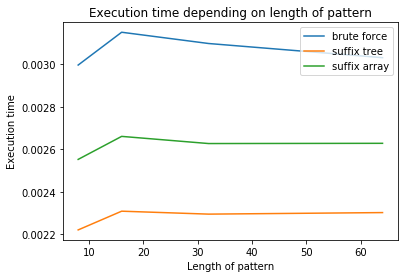

In [3]:
mean_bf = data_BF.mean(axis = 0)
mean_st = data_ST.mean(axis = 0)
mean_sa = data_SA.mean(axis = 0)

speedup_st = mean_bf/mean_st
speedup_sa = mean_bf/mean_sa

init = 2

# plotting results of means
fig, ax = plt.subplots()
ax.plot(exp[init:6],mean_bf[init:6], label = 'brute force')
ax.plot(exp[init:6],mean_st[init:6], label = 'suffix tree')
ax.plot(exp[init:6],mean_sa[init:6], label = 'suffix array')
ax.legend()
ax.title.set_text('Execution time depending on length of pattern')
ax.set_xlabel('Length of pattern')
ax.set_ylabel('Execution time')

Considerando el texto "english.10MB", se toma un texto de tamaño 20.000 (comenzando desde el caracter inicial hasta el caracter 20.000) el cual va a ser analizado. Se realizan 6 experimentos, en donde en cada experimento se considera un largo del patrón diferente. Los largos considerados son 4, 8, 16, 32, 64. En cada experimento se realizan 3.000 repeticiones, en donde en cada repetición se escoge un patrón aleatorio de tamaño constante.

Los resultados son presentados a continuación, en donde se tienen los promedios de cada experimento en función del largo del patrón. Se observa que a medida que aumenta el largo del patrón, el tiempo de ejecución para los 3 métodos aumenta, esto ya que se debe realizar mayor número de comparaciones.

Por otro lado, al observar los tiempos de ejecución de cada implementación, se tiene que para todos los largo de patrón analizados, el mayor tiempo de ejecución siempre se obtiene mediante el algoritmo de fuerza bruta. 

Al comparar entre suffix tree y suffix array, se tiene que el tiempo de ejecución es mayor para el suffix array (para todo largo analizado).

Además cabe destacar que para largo de patron de 16, se tiene el máximo timepo de ejecución, y que luego de este valor el tiempo disminuye, llegando incluso a mantener de forma constante su valor para largos superiores a 16.

Producto de que se está haciendo un mejor uso de los recursos computacionales, se analiza el speedup de cada implementación, considerando que el caso base corresponde al algoritmo brute force. Los resultados son presentados en el siguiente gráfico, en donde se observa que la implementación utilizando suffix array logra una aceleración máxima de 1,18. Para el caso de la utilización del suffix tree, se tiene un speedup de 1,36, superando el valor logrado por suffix array.

Text(0, 0.5, 'Execution time')

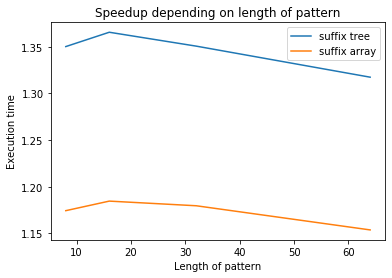

In [4]:
# plotting results of speed up
fig, ax = plt.subplots()
ax.plot(exp[init:6],speedup_st[init:6], label = 'suffix tree')
ax.plot(exp[init:6],speedup_sa[init:6], label = 'suffix array')
# ax.plot(exp[1:6],mean_sa[1:6], label = 'suffix array')
ax.legend()
ax.title.set_text('Speedup depending on length of pattern')
ax.set_xlabel('Length of pattern')
ax.set_ylabel('Execution time')

De los resultados obtenidos se logra concluir que para la resolución del mismo problema, en este caso pattern matching, se pueden obtener mejores tiempos de ejecución considerando estructuras de datos adecuadas para almacenar los datos y lograr ejecutar el matching de forma eficiente. 

Los resultados indican que utilizando estructuras adecuadas y algoritmos de búsqueda apropiados para las estructuras, se pueden lograr aceleraciones de hasta 1,36 veces (comparados con la solución utilizando fuerza bruta).

In [19]:
# Wrong behavior
df_SA = pd.read_csv('size_SA_vs_text', sep = ',', header = None) # name_text_lenght_reapts
# df_SA = pd.read_csv('times_SA_english_50k_2k', sep = ',', header = None)# name_text_lenght_reapts
# df_ST = pd.read_csv('times_ST_english_50k_2k', sep = ',', header = None)# name_text_lenght_reapts

# This is the better
# df_BF = pd.read_csv('times_BF_english_80k_2k', sep = ',', header = None) # name_text_lenght_reapts
# df_SA = pd.read_csv('times_SA_english_80k_2k', sep = ',', header = None)# name_text_lenght_reapts
# df_ST = pd.read_csv('times_ST_english_80k_2k', sep = ',', header = None)# name_text_lenght_reapts

# # Wrong behavior
# df_BF = pd.read_csv('times_BF_english_90k_2k', sep = ',', header = None) # name_text_lenght_reapts
# df_SA = pd.read_csv('times_SA_english_90k_2k', sep = ',', header = None)# name_text_lenght_reapts
# df_ST = pd.read_csv('times_ST_english_90k_2k', sep = ',', header = None)# name_text_lenght_reapts

# # Number of experiments
# exp = [2, 4, 8, 16, 32, 64]
# nump_exp = len(exp)

# # df.head()
df_SA = df_SA.iloc[:,0:2]
# df_SA = df_SA.iloc[:,0:nump_exp]
# df_ST = df_ST.iloc[:,0:nump_exp]
# # print(df.describe())

# data_BF = df_BF.vsalues
data_SA = df_SA.values
# data_ST = df_ST.values

Text(0, 0.5, 'Size [kB]')

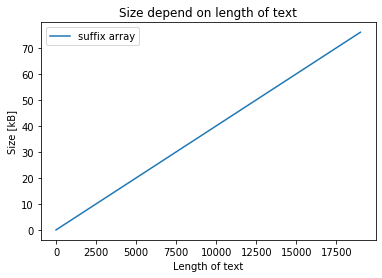

In [20]:
# Plot size v/s text size

# plotting results of means
fig, ax = plt.subplots()
ax.plot(data_SA[:,0], data_SA[:,1]/1000, label = 'suffix array')
# ax.plot(exp[init:6],mean_st[init:6], label = 'suffix tree')
# ax.plot(exp[init:6],mean_sa[init:6], label = 'suffix array')
ax.legend()
ax.title.set_text('Size depend on length of text')
ax.set_xlabel('Length of text')
ax.set_ylabel('Size [kB]')

Al observar el tamaño del suffix array, se tiene que es proporcional al largo del texto. Esto es totalmente esperable ya que el array debe contener los n sufijos del texto de largo n. Cabe destacar además, que este espacio es un espacio adicional que se debe utilizar para almacenar la estructura, lo que no ocurre para el caso del algoritmo de fuerza bruta, el cual no debe utilizar espacio adicional.

FALTA AGREGAR SIZE DE SUFFIX TREE Y COMPARAR ENTRE ESTRUCTURAS.

FALTA AGREGAR ANALISIS DE TEXTO FIBONACCI Y REPETIR MISMO ANALISIS ANTERIOR

AGREGAR CONCLUSION FINAL